In [1]:
import pandas
import numpy

In [2]:
!pip install matplotlib
!pip install -U scikit-learn

In [3]:
dftrain = pandas.read_csv("fraudTrain.csv")
dftrain

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [4]:
dftest = pandas.read_csv("fraudTest.csv")
dftest

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [5]:

print( dftrain.columns)


Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [6]:
print( dftest.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [7]:
#Unnamed: 0: Usually an index column from a DataFrame export. Not useful for analysis.
#first: First name of the cardholder. Less likely to be useful as names are common.
#last: Last name of the cardholder. Same as the first name, commonality reduces its usefulness.
#street: Street address. Specific address details are less likely to be useful in detecting fraud.
#dob: Date of birth. While it might help in identifying the cardholder, it’s less likely to help in fraud detection.
#job: The cardholder's job. It might offer some context but is generally less useful compared to other features.


In [8]:


# Assuming your DataFrame is named df
# List of columns to drop
columns_to_drop = ['Unnamed: 0', 'first', 'last', 'street', 'dob', 'job']

# Drop the specified columns
dftrain = dftrain.drop(columns=columns_to_drop)

# If you want to drop the columns in place without creating a new DataFrame
# df.drop(columns=columns_to_drop, inplace=True)

# Display the updated DataFrame

dftest = dftest.drop(columns=columns_to_drop)

In [9]:
print(dftrain)

        trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt gender  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97      F   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F   
2                       fraud_Lind-Buckridge  entertainment  220.11      M   
3         fraud_Kutch, Hermiston and Fa

In [10]:
print(dftest)

       trans_date_trans_time            cc_num  \
0        2020-06-21 12:14:25  2291163933867244   
1        2020-06-21 12:14:33  3573030041201292   
2        2020-06-21 12:14:53  3598215285024754   
3        2020-06-21 12:15:15  3591919803438423   
4        2020-06-21 12:15:17  3526826139003047   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt gender  \
0                      fraud_Kirlin and Sons   personal_care    2.86      M   
1                       fraud_Sporer-Keebler   personal_care   29.84      F   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28      F   
3                          fraud_Haley Group        misc_pos   60.05      M   
4   

In [11]:
dftest['trans_date_trans_time'] = pandas.to_datetime(dftest['trans_date_trans_time'])

In [12]:
dftest['hour'] = dftest['trans_date_trans_time'].dt.hour

In [13]:
dftest['hour']

0         12
1         12
2         12
3         12
4         12
          ..
555714    23
555715    23
555716    23
555717    23
555718    23
Name: hour, Length: 555719, dtype: int32

In [14]:
dftrain['trans_date_trans_time'] = pandas.to_datetime(dftrain['trans_date_trans_time'])

In [15]:
dftrain['hour'] = dftrain['trans_date_trans_time'].dt.hour

In [16]:
dftrain['hour']

0           0
1           0
2           0
3           0
4           0
           ..
1296670    12
1296671    12
1296672    12
1296673    12
1296674    12
Name: hour, Length: 1296675, dtype: int32

In [17]:
print(dftest)

       trans_date_trans_time            cc_num  \
0        2020-06-21 12:14:25  2291163933867244   
1        2020-06-21 12:14:33  3573030041201292   
2        2020-06-21 12:14:53  3598215285024754   
3        2020-06-21 12:15:15  3591919803438423   
4        2020-06-21 12:15:17  3526826139003047   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt gender  \
0                      fraud_Kirlin and Sons   personal_care    2.86      M   
1                       fraud_Sporer-Keebler   personal_care   29.84      F   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28      F   
3                          fraud_Haley Group        misc_pos   60.05      M   
4   

In [18]:
columns_to_drop = ['trans_date_trans_time']

# Drop the specified columns
dftrain = dftrain.drop(columns=columns_to_drop)

# If you want to drop the columns in place without creating a new DataFrame
# df.drop(columns=columns_to_drop, inplace=True)

# Display the updated DataFrame

dftest = dftest.drop(columns=columns_to_drop)

In [19]:
dftrain.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'hour'],
      dtype='object')

In [20]:
dftrain.head()

,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0


In [21]:
dftest.head()

,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,29209,33.9659,-80.9355,333497,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,12
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,84002,40.3207,-110.4360,302,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,12
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,11710,40.6729,-73.5365,34496,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,12
3,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,32780,28.5697,-80.8191,54767,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,12
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,49632,44.2529,-85.0170,1126,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,12


In [22]:
print( dftest.columns)

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'hour'],
      dtype='object')


In [23]:
print( dftrain.columns)

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'hour'],
      dtype='object')


In [24]:

from sklearn.preprocessing import LabelEncoder
# Columns to encode
columns_to_encode = ['category', 'merchant', 'gender', 'state', 'city']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each column
for col in columns_to_encode:
    dftest[col] = le.fit_transform(dftest[col])


In [25]:
from sklearn.preprocessing import LabelEncoder
# Columns to encode
columns_to_encode = ['category', 'merchant', 'gender', 'state', 'city']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each column
for col in columns_to_encode:
    dftrain[col] = le.fit_transform(dftrain[col])


In [26]:
dftest.head()

,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour
0,2291163933867244,319,10,2.86,1,157,39,29209,33.9659,-80.9355,333497,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,12
1,3573030041201292,591,10,29.84,0,16,43,84002,40.3207,-110.4360,302,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,12
2,3598215285024754,611,5,41.28,0,61,33,11710,40.6729,-73.5365,34496,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,12
3,3591919803438423,222,9,60.05,1,764,8,32780,28.5697,-80.8191,54767,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,12
4,3526826139003047,292,13,3.19,1,247,21,49632,44.2529,-85.0170,1126,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,12


In [27]:
dftrain.head()

,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour
0,2703186189652095,514,8,4.97,0,526,27,28654,36.0788,-81.1781,3495,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0
1,630423337322,241,4,107.23,0,612,47,99160,48.8878,-118.2105,149,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0
2,38859492057661,390,0,220.11,1,468,13,83252,42.1808,-112.2620,4154,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0
3,3534093764340240,360,2,45.00,1,84,26,59632,46.2306,-112.1138,1939,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0
4,375534208663984,297,9,41.96,1,216,45,24433,38.4207,-79.4629,99,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0


In [28]:
columns_to_drop = ['trans_num']

# Drop the specified columns
dftrain = dftrain.drop(columns=columns_to_drop)

# If you want to drop the columns in place without creating a new DataFrame
# df.drop(columns=columns_to_drop, inplace=True)

# Display the updated DataFrame

dftest = dftest.drop(columns=columns_to_drop)

In [29]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
# Sample data for illustration purposes (replace with actual dftrain and dftest)


# Separate features and target variable for training data
X_train = dftrain.drop(columns=['is_fraud'])
y_train = dftrain['is_fraud']

# Separate features and target variable for testing data
X_test = dftest.drop(columns=['is_fraud'])
y_test = dftest['is_fraud']


In [32]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
# Define the parameter grid
param_grid = {
    'criterion': ['entropy'],
    'splitter': ['best'],
    'max_depth': [20],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'min_weight_fraction_leaf': [ 0.1],
    'max_features': [None],
    'random_state': [42],
    'max_leaf_nodes': [10],
    'min_impurity_decrease': [0.1],
    'class_weight': ['balanced'],
    'ccp_alpha': [ 0.01],
}

# Initialize the classifier
dt = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


Fitting 2 folds for each of 1 candidates, totalling 2 fits


Best parameters found:  {'ccp_alpha': 0.01, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1, 'random_state': 42, 'splitter': 'best'}


In [41]:
# Fit the best model on the scaled training data
best_dt = grid_search.best_estimator_

best_dt.fit(X_train_scaled, y_train)

# Predict on the test data
Ypred = best_dt.predict(X_test_scaled)


In [44]:
accuracy = accuracy_score(y_test, Ypred)
precision = precision_score(y_test, Ypred)
recall = recall_score(y_test, Ypred)
conf_matrix = confusion_matrix(y_test, Ypred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.9718274883529265
Precision: 0.09521241536341303
Recall: 0.7407925407925408
Confusion Matrix:
[[538474  15100]
 [   556   1589]]


In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, precision_recall_curve

True Positive: 1589
True Negative: 538474
False Positive: 15100
False Negative: 556


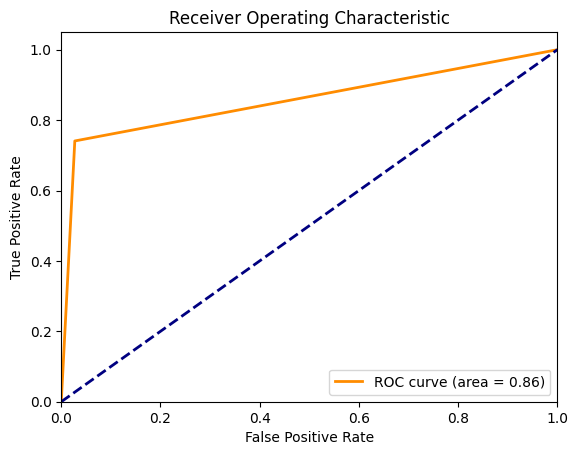

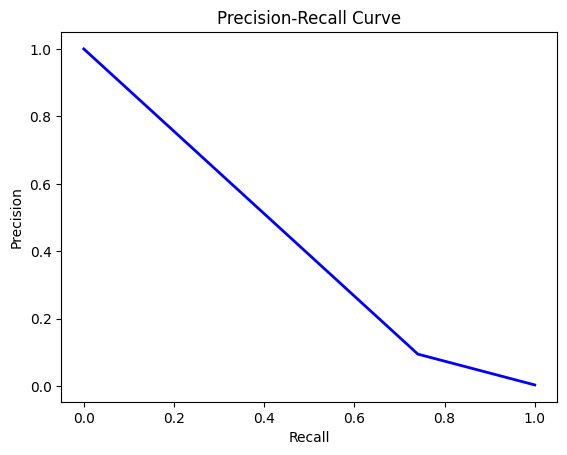

In [52]:
tn, fp, fn, tp = conf_matrix.ravel()

print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_dt.predict_proba(X_test_scaled)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, best_dt.predict_proba(X_test_scaled)[:,1])

plt.figure()
plt.plot(recall_curve, precision_curve, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
